In [1]:
import pandas as pd

In [4]:
nomes_masculinos = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")
nomes_femininos = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

In [5]:
print(f"Quantidade de Nomes: {len(nomes_femininos) + len(nomes_masculinos)}")

Quantidade de Nomes: 400


In [6]:
frames = [nomes_femininos, nomes_masculinos]

In [8]:
nomes = pd.concat(frames)['nome'].to_frame()

In [9]:
nomes.sample(5)

,nome
41,DANIELA
185,JONATAN
1,JOAO
186,ERIC
1,ANA


In [10]:
#Incluindo ID dos Alunos

In [11]:
import numpy as np
np.random.seed(123)

In [12]:
total_alunos = len(nomes)

In [13]:
nomes["id_aluno"] = np.random.permutation(total_alunos) + 1

In [14]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [18]:
dominios = ['@dominio.com.br', '@servico.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos)


In [19]:
nomes.sample(5)

,nome,id_aluno,dominio
190,NATANAEL,58,@servico.com
104,REINALDO,28,@servico.com
193,LUCILENE,146,@servico.com
98,THAIS,148,@dominio.com.br
2,ANTONIO,205,@dominio.com.br


In [20]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()

In [21]:
nomes.sample(5)

,nome,id_aluno,dominio,email
101,SILVIO,363,@servico.com,silvio@servico.com
71,MARTA,265,@servico.com,marta@servico.com
137,AUGUSTO,376,@dominio.com.br,augusto@dominio.com.br
15,BRUNO,293,@dominio.com.br,bruno@dominio.com.br
163,REGIANE,308,@dominio.com.br,regiane@dominio.com.br


Criando a tabela Cursos

In [22]:
!pip install html5lib
!pip install lxml

In [23]:
import html5lib

In [26]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [30]:
cursos = cursos[0]

In [31]:
type(cursos)

pandas.core.frame.DataFrame

In [32]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [34]:
cursos = cursos.rename(columns = {'Nome do curso' : 'nome_do_curso'})

In [35]:
cursos['id'] = cursos.index + 1

In [36]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [37]:
cursos = cursos.set_index('id')

In [38]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


#Matriculando os alunos nos cursos

In [45]:
nomes['matriculas'] = np.ceil(np.random.exponential(size = total_alunos) * 1.5).astype(int)

In [46]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
150,EDMILSON,326,@dominio.com.br,edmilson@dominio.com.br,2
65,MAURICIO,395,@dominio.com.br,mauricio@dominio.com.br,1
92,DIOGO,61,@servico.com,diogo@servico.com,3
20,MANOEL,101,@servico.com,manoel@servico.com,2
182,LIDIANE,389,@servico.com,lidiane@servico.com,2


In [48]:
nomes.matriculas.describe()

count    400.000000
mean       2.087500
std        1.485044
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       11.000000
Name: matriculas, dtype: float64

In [49]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


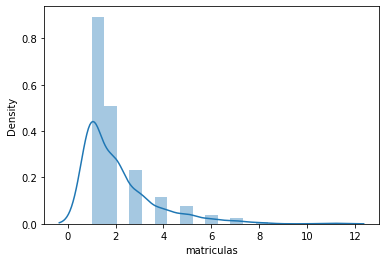

In [50]:
sns.distplot(nomes.matriculas)

In [51]:
nomes.matriculas.value_counts()

1     188
2     107
3      49
4      24
5      16
6       8
7       5
8       2
11      1
Name: matriculas, dtype: int64

#Selecionando Cursos

In [52]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [53]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)
matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [54]:
matriculas.head(10)

,id_aluno,id_curso
0,235,20
1,235,7
2,235,17
3,235,5
4,235,3
5,43,17
6,304,11
7,304,9
8,304,9
9,156,20


In [56]:
matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,17,Lógica de programação
2,42,Java para Web
3,50,C# para Web
4,63,Ruby on Rails
5,68,Cursos de Python
6,16,PHP com MySql
7,67,.NET para web
9,70,TDD com Java
10,38,Código limpo com C#


In [57]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns = {'id_aluno':'quantidade_de_alunos'})

In [59]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,17,Lógica de programação
2,42,Java para Web
3,50,C# para Web
4,63,Ruby on Rails
5,68,Cursos de Python
6,16,PHP com MySql
7,67,.NET para web
9,70,TDD com Java
10,38,Código limpo com C#


#Saída em diferentes formatos

In [60]:
matriculas_por_curso.to_csv('matriculas_por_curso.csv', index = False)

In [61]:
matriculas_json = matriculas_por_curso.to_json()

In [62]:
matriculas_json

'{"quantidade_de_alunos":{"1":17,"2":42,"3":50,"4":63,"5":68,"6":16,"7":67,"9":70,"10":38,"11":53,"12":20,"13":8,"14":20,"15":50,"16":11,"17":67,"18":65,"19":28,"20":82},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [63]:
matriculas_html = matriculas_por_curso.to_html()

In [65]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>17</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>42</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>50</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>63</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>68</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>16</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>67</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>9</th>
      <td>70</td>
      <td>TDD com Java</td>
    </tr>
    <tr>
      <th>10</th>
      <td>38</td>
      <td>Cód

# Criando o banco sql

In [66]:
!pip install sqlalchemy

In [67]:
from sqlalchemy import create_engine, MetaData, Table

In [68]:
engine = create_engine('sqlite:///:memory:')

In [70]:
type(engine)

sqlalchemy.engine.base.Engine

In [71]:
matriculas_por_curso.to_sql('matriculas', engine)

In [72]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Buscando do banco sql

In [75]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [76]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,1,17,Lógica de programação
1,6,16,PHP com MySql
2,13,8,Persistência com .NET
3,16,11,Estatística básica


In [77]:
pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

,nome_do_curso,quantidade_de_alunos
0,Lógica de programação,17
1,Java para Web,42
2,C# para Web,50
3,Ruby on Rails,63
4,Cursos de Python,68
5,PHP com MySql,16
6,.NET para web,67
7,TDD com Java,70
8,Código limpo com C#,38
9,Preparatório para certificação Java,53


In [78]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns = ['nome_do_curso', 'quantidade_de_alunos'])

In [81]:
muitas_matriculas.query('quantidade_de_alunos > 70')

,nome_do_curso,quantidade_de_alunos
18,Orientação objetos com Java,82


In [82]:
muitas_matriculas = muitas_matriculas.query('quantidade_de_alunos > 65')

In [83]:
muitas_matriculas

,nome_do_curso,quantidade_de_alunos
4,Cursos de Python,68
6,.NET para web,67
7,TDD com Java,70
15,Internet das coisas,67
18,Orientação objetos com Java,82


In [84]:
muitas_matriculas.to_sql('muitas_matriculas', con = engine)

In [85]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


# Nomes dos alunos da próxima turma

In [88]:
matriculas_por_curso

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,17,Lógica de programação
2,42,Java para Web
3,50,C# para Web
4,63,Ruby on Rails
5,68,Cursos de Python
6,16,PHP com MySql
7,67,.NET para web
9,70,TDD com Java
10,38,Código limpo com C#


In [89]:
matriculas

,id_aluno,id_curso
0,235,20
1,235,7
2,235,17
3,235,5
4,235,3
...,...,...
830,383,15
831,383,17
832,383,20
833,383,15


In [91]:
id_curso = 17
proxima_turma = matriculas.query(f"id_curso == {id_curso}")

In [92]:
proxima_turma

,id_aluno,id_curso
2,235,17
5,43,17
11,343,17
13,55,17
17,288,17
...,...,...
796,97,17
805,58,17
828,383,17
829,383,17


In [93]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
6,17,CINTIA,@dominio.com.br,cintia@dominio.com.br,7
6,17,CINTIA,@dominio.com.br,cintia@dominio.com.br,7
6,17,CINTIA,@dominio.com.br,cintia@dominio.com.br,7
22,17,LUCIENE,@dominio.com.br,luciene@dominio.com.br,3
34,17,BRUNA,@servico.com,bruna@servico.com,2
...,...,...,...,...,...
377,17,VALERIA,@dominio.com.br,valeria@dominio.com.br,2
383,17,ALVARO,@servico.com,alvaro@servico.com,8
383,17,ALVARO,@servico.com,alvaro@servico.com,8


In [94]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']

id_aluno
6       CINTIA
6       CINTIA
6       CINTIA
22     LUCIENE
34       BRUNA
        ...   
377    VALERIA
383     ALVARO
383     ALVARO
383     ALVARO
385     MICHEL
Name: nome, Length: 67, dtype: object

In [96]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

,nome
id_aluno,
6,CINTIA
6,CINTIA
6,CINTIA
22,LUCIENE
34,BRUNA
...,...
377,VALERIA
383,ALVARO
383,ALVARO


In [97]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Internet das coisas
Name: 17, dtype: object

In [98]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Internet das coisas'

In [99]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [100]:
proxima_turma

,nome
id_aluno,
6,CINTIA
6,CINTIA
6,CINTIA
22,LUCIENE
34,BRUNA
...,...
377,VALERIA
383,ALVARO
383,ALVARO


In [102]:
proxima_turma = proxima_turma.rename(columns = {'nome' : 'Alunos do curso de {}'.format(nome_curso)})

In [104]:
proxima_turma.head()

,Alunos do curso de Internet das coisas
id_aluno,
6,CINTIA
6,CINTIA
6,CINTIA
22,LUCIENE
34,BRUNA


# Exportando para Excel

In [105]:
proxima_turma.to_excel('proxima_turma.xlsx', index = False)